<a href="https://colab.research.google.com/github/dtoralg/INESDI_Data-Science_ML_IA/blob/main/%5B03%5D%20-%20Modelos%20Supervisados%20Alternativos/Supervisados_Alternativos_Ejercicio_1_KNN_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervisados Alternativos - Ejercicio 1: knn_iris.ipynb

Este notebook es un **I do**: todo resuelto y explicado paso a paso.

## Objetivos

- Cargar y explorar el dataset Iris.
- Entender y aplicar KNN: efecto de `k`, `weights` y escalado.
- Probar manualmente varios `k` y visualizar resultados.
- Mostrar fronteras de decisión en 2D y evaluación del modelo.

## Descripción del dataset

El dataset Iris contiene 150 muestras de flores de tres especies (setosa, versicolor, virginica) con 4 características: sepal length, sepal width, petal length y petal width. Es ideal para explicar conceptos de clasificación y visualizar fronteras de decisión.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
np.random.seed(42)

In [2]:
# 1) Cargar dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
target_names = iris.target_names

print('Dimensiones:', X.shape)
display(X.head())
print('\nClases:', np.unique(y))
print('\nDistribución por clase:')
display(y.value_counts().sort_index())

Dimensiones: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Clases: [0 1 2]

Distribución por clase:


,count
species,
0,50
1,50
2,50


## 2) Exploración rápida y visualización

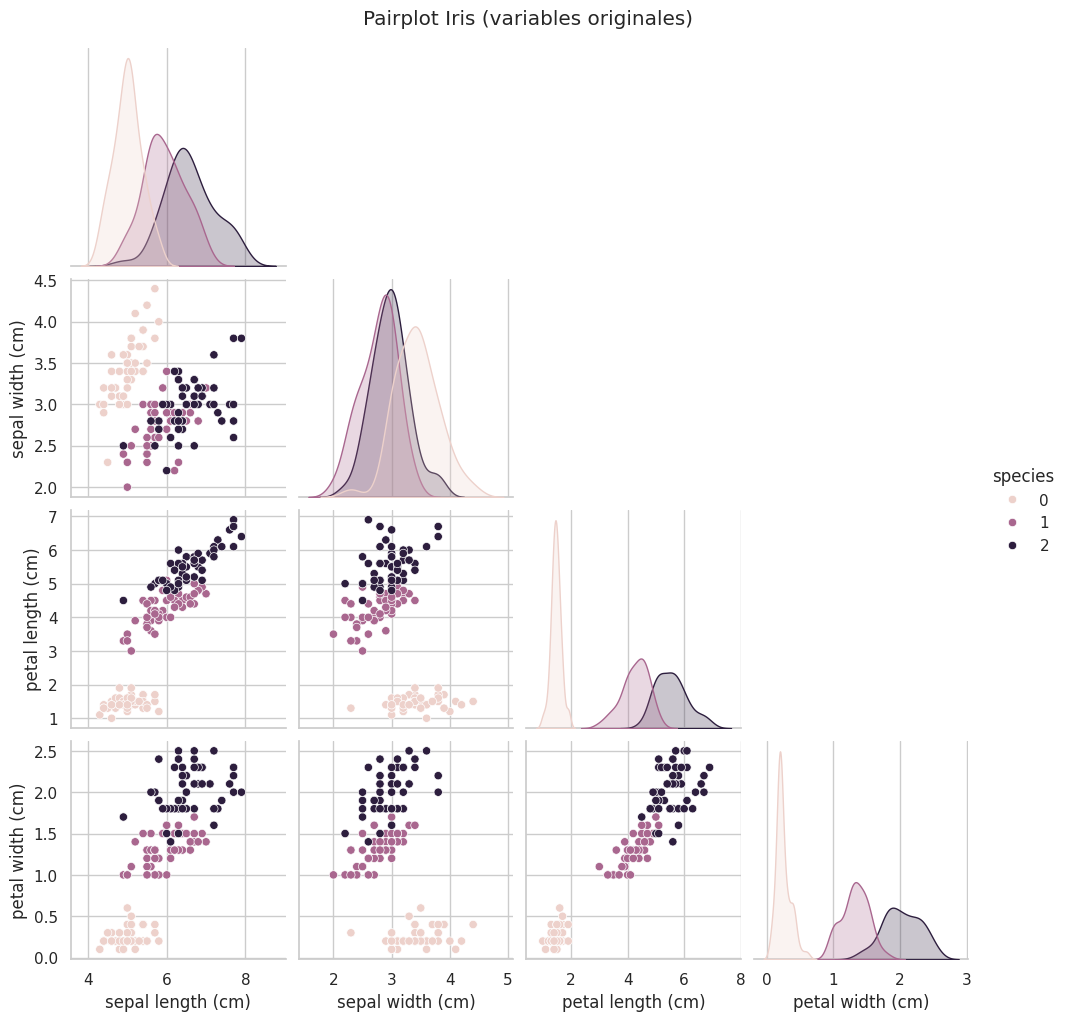

In [3]:
# Pairplot para ver relaciones entre variables (colorear por especie)
sns.pairplot(pd.concat([X, y], axis=1), hue='species', corner=True)
plt.suptitle('Pairplot Iris (variables originales)', y=1.02)
plt.show()

## 3) Preprocesado: escalado

KNN es sensible a la escala porque usa distancias. Aplicaremos StandardScaler a todas las características.

In [4]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
display(X_scaled.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,-1.468455e-15,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal width (cm),150.0,-1.823726e-15,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal length (cm),150.0,-1.610564e-15,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal width (cm),150.0,-9.473903e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


## 4) División train/test

In [5]:
# Split estratificado para mantener proporciones de clase
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print('Train:', X_train.shape, 'Test:', X_test.shape)
print('Distribución train:', y_train.value_counts().to_dict())
print('Distribución test:', y_test.value_counts().to_dict())

Train: (120, 4) Test: (30, 4)
Distribución train: {0: 40, 2: 40, 1: 40}
Distribución test: {0: 10, 2: 10, 1: 10}


## 5) Baseline: KNN con k=5

Accuracy: 0.9333333333333333

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



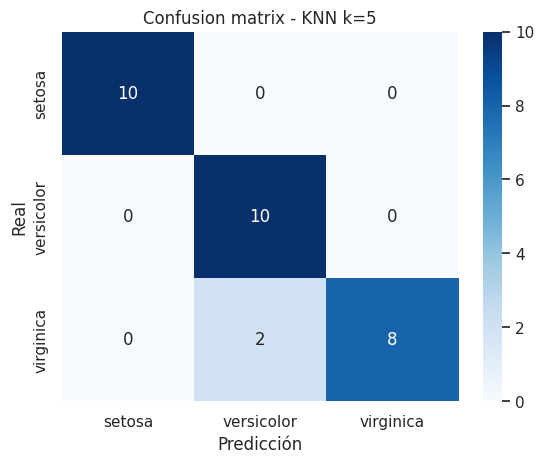

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n')
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion matrix - KNN k=5')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 6) Probar manualmente varios valores de `k` (sin GridSearchCV)

In [7]:
# Probamos varios k manualmente y registramos accuracy en test
k_list = [1,3,5,7,9,11,15]
results = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    results.append({'k': k, 'accuracy': acc})
results_df = pd.DataFrame(results).set_index('k')
results_df

# Elegimos el k con mejor accuracy sobre test (manual, para clase)
best_k = int(results_df['accuracy'].idxmax())
best_acc = results_df['accuracy'].max()
print(f'Best k (test): {best_k} -> accuracy = {best_acc:.3f}')

Best k (test): 1 -> accuracy = 0.967


## 7) Visualizar accuracy en función de k

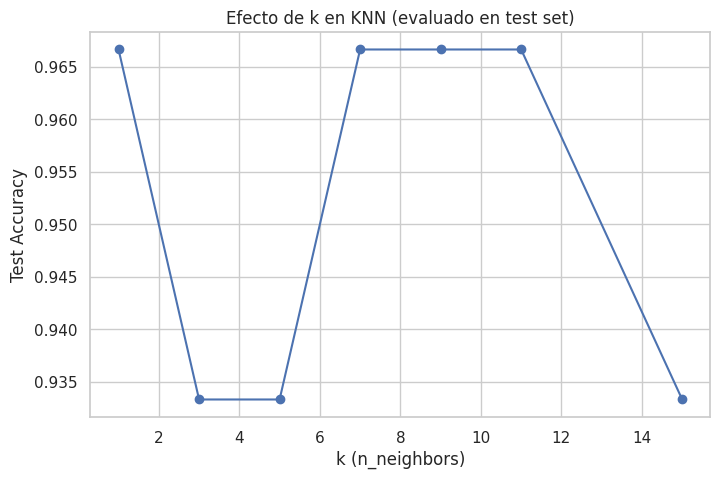

In [8]:
plt.figure(figsize=(8,5))
plt.plot(results_df.index, results_df['accuracy'], marker='o')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Efecto de k en KNN (evaluado en test set)')
plt.grid(True)
plt.show()

## 8) Fronteras de decisión en 2D (dos features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


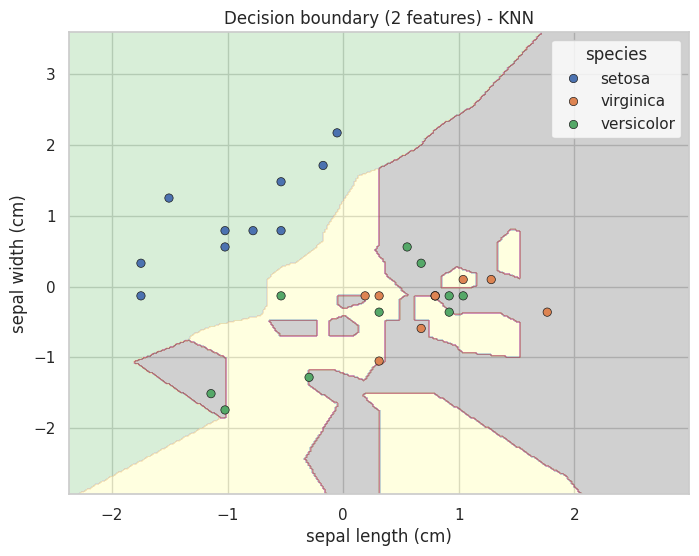

In [9]:
# Para visualizar fronteras tomamos las dos primeras features: sepal length (0) y sepal width (1)
feature_idx = [0, 1]
X2 = X_scaled.iloc[:, feature_idx]
X2_train, X2_test = X2.loc[X_train.index], X2.loc[X_test.index]

model_2d = KNeighborsClassifier(n_neighbors=best_k)
model_2d.fit(X2_train, y_train)

# Meshgrid
x_min, x_max = X2.iloc[:,0].min() - 0.5, X2.iloc[:,0].max() + 0.5
y_min, y_max = X2.iloc[:,1].min() - 0.5, X2.iloc[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
sns.scatterplot(x=X2_test.iloc[:,0], y=X2_test.iloc[:,1], hue=y_test.map({0:target_names[0],1:target_names[1],2:target_names[2]}),
                palette='deep', edgecolor='k')
plt.xlabel(X2.columns[0])
plt.ylabel(X2.columns[1])
plt.title('Decision boundary (2 features) - KNN')
plt.show()

## 9) Fronteras de decisión en 2D usando PCA (todas las features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


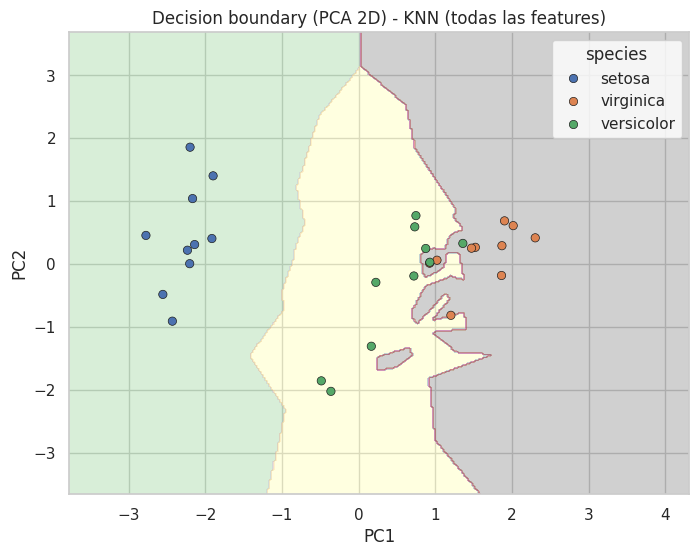

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
X_pca_train, X_pca_test = X_pca_df.loc[X_train.index], X_pca_df.loc[X_test.index]

model_pca = KNeighborsClassifier(n_neighbors=best_k)
model_pca.fit(X_pca_train, y_train)

xx, yy = np.meshgrid(np.linspace(X_pca_df['PC1'].min()-1, X_pca_df['PC1'].max()+1, 300),
                     np.linspace(X_pca_df['PC2'].min()-1, X_pca_df['PC2'].max()+1, 300))
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
sns.scatterplot(x=X_pca_test['PC1'], y=X_pca_test['PC2'], hue=y_test.map({0:target_names[0],1:target_names[1],2:target_names[2]}),
                palette='deep', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision boundary (PCA 2D) - KNN (todas las features)')
plt.show()

## 10) Conclusión
- KNN es un algoritmo sencillo e intuitivo: la elección de `k` y el escalado son críticos.
- `weights='distance'` puede ayudar cuando hay clases cercanas con densidades distintas.
- Visualizar las fronteras en 2D (features reales o PCA) ayuda a entender el comportamiento del clasificador.

En próximos ejercicios compararemos KNN con SVM sobre los mismos datasets para contrastar inductivas y comportamientos.